In [49]:
!curl "https://www.codeheroku.com/static/workshop/datasets/malaria_detection/train.csv" -o "train.csv"
!curl "https://www.codeheroku.com/static/workshop/datasets/malaria_detection/test.csv" -o "test.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  181M  100  181M    0     0  12.1M      0  0:00:14  0:00:14 --:--:-- 14.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 45.5M  100 45.5M    0     0  8594k      0  0:00:05  0:00:05 --:--:-- 10.0M


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical



In [51]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [52]:
test_df.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,...,pixel_2460,pixel_2461,pixel_2462,pixel_2463,pixel_2464,pixel_2465,pixel_2466,pixel_2467,pixel_2468,pixel_2469,pixel_2470,pixel_2471,pixel_2472,pixel_2473,pixel_2474,pixel_2475,pixel_2476,pixel_2477,pixel_2478,pixel_2479,pixel_2480,pixel_2481,pixel_2482,pixel_2483,pixel_2484,pixel_2485,pixel_2486,pixel_2487,pixel_2488,pixel_2489,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
0,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,65,181,180,180,184,183,35,1,0,0,0,0,0,0,0,0,0,0,0,0,...,3,120,190,190,190,165,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,0,123,177,176,174,172,160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70,152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96,176,175,175,176,176,176,105,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,101,185,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,183,183,149,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,158,184,182,182,183,71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124,143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
X_train = train_df.drop("label",axis=1).values
y_train = train_df["label"].values

X_test = test_df.drop("label",axis=1).values
y_test = test_df["label"].values 

Parasitized


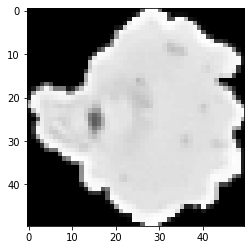

In [54]:
index = 100

plt.imshow(X_train[index].reshape(50,50),cmap='gray')
print(y_train[index])

In [55]:
X_train = X_train.reshape(train_df.shape[0],50,50,1).astype('float32')
X_train = X_train / 255.0

X_test = X_test.reshape(test_df.shape[0],50,50,1).astype('float32')
X_test = X_test / 255.0


In [56]:
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [67]:
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_test (5512, 50, 50, 1)
y_test (5512, 2)


In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [58]:
 model = Sequential()
 model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(50,50,1)))
 model.add(MaxPooling2D(pool_size=2))

 model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))
 model.add(MaxPooling2D(pool_size=2))

 model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
 model.add(MaxPooling2D(pool_size=2))

 model.add(Dropout(rate=0.2))
 model.add(Flatten())

 model.add(Dense(units=200,activation='relu'))
 model.add(Dropout(rate=0.5))

 model.add(Dense(units=2,activation='softmax'))

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 50, 50, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 6, 64)         

In [63]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [64]:
model.fit(X_train,y_train,batch_size=50,epochs=20,verbose=1)

Epoch 1/20
441/441 [==============================] - 4s 9ms/step - loss: 0.4661 - accuracy: 0.7514
Epoch 2/20
441/441 [==============================] - 4s 8ms/step - loss: 0.1924 - accuracy: 0.9310
Epoch 3/20
441/441 [==============================] - 4s 8ms/step - loss: 0.1622 - accuracy: 0.9417
Epoch 4/20
441/441 [==============================] - 4s 8ms/step - loss: 0.1514 - accuracy: 0.9475
Epoch 5/20
441/441 [==============================] - 4s 8ms/step - loss: 0.1425 - accuracy: 0.9494
Epoch 6/20
441/441 [==============================] - 4s 8ms/step - loss: 0.1346 - accuracy: 0.9512
Epoch 7/20
441/441 [==============================] - 4s 8ms/step - loss: 0.1305 - accuracy: 0.9526
Epoch 8/20
441/441 [==============================] - 4s 8ms/step - loss: 0.1242 - accuracy: 0.9556
Epoch 9/20
441/441 [==============================] - 4s 8ms/step - loss: 0.1173 - accuracy: 0.9571
Epoch 10/20
441/441 [==============================] - 4s 8ms/step - loss: 0.1138 - accuracy: 0.9583

In [69]:
predictions = model.evaluate(X_test, y_test)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

173/173 [==============================] - 1s 4ms/step - loss: 0.1683 - accuracy: 0.9519
X_test (5512, 50, 50, 1)
y_test (5512, 2)


Actual: , [0. 1.]
Predected:  [[0.00173972 0.9982603 ]]


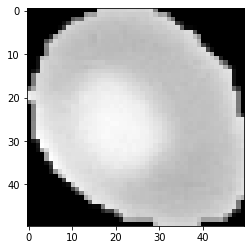

In [82]:
index = 4001
plt.imshow(X_test[index].reshape(50,50),cmap='gray')
print("Actual: ,",y_test[index])
print("Predected: ", model.predict(X_test[[index]]))